## Get started   - "Hello World 1" (MNIST) & "Hello World 2" (Fashion MNIST)

Adapted from:<br>
https://github.com/tensorflow/docs/blob/master/site/en/r2/tutorials/quickstart/beginner.ipynb and <br>
https://github.com/tensorflow/docs/blob/master/site/en/r2//tutorials/keras/basic_classification.ipynb

In [1]:
# Copyright 2019 The TensorFlow Authors.
#
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

### See README.md file for Tensorflow 2.0 installation and conda environment (tf2-cpu) setting
!pip install -q tensorflow==2.0.0-beta1

In [3]:
import tensorflow as tf
import numpy as np

**Install helper libraries (in the tf2-cpu environment)**<br>
```python
!pip install matplotlib
!pip install pydot
!pip install graphviz
```

In [4]:
#!pip install matplotlib
#!pip install pydot
#!pip install graphviz
# If in Windows 10, use 
#  conda install graphviz
# at the Anaconda prompt within the TF2-CPU environment

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import pydot
import graphviz

In [6]:
print('tf version:', tf.__version__)
print('matplotlib version:', matplotlib.__version__)
print('pydot version:', pydot.__version__)
print('graphviz version:', graphviz.__version__)

tf version: 2.0.0-beta1
matplotlib version: 3.1.1
pydot version: 1.4.1
graphviz version: 0.11.1


### Load and prepare the [MNIST](http://yann.lecun.com/exdb/mnist) dataset. 


Here are [sample images](https://en.wikipedia.org/wiki/MNIST_database) from MNIST test dataset  (each class takes one row):

![mnist](assets/MnistExamples.png)


Convert the samples from integers to floating-point numbers:

In [7]:
mnist = tf.keras.datasets.mnist

In [8]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [9]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### Explore the MNIST data

**Training set**

In [10]:
print(x_train.shape)
print(y_train)
u, cnt = np.unique(y_train, return_counts=True)
print('unique labels:', u, 'their counts:', cnt)
print(len(y_train))

(60000, 28, 28)
[5 0 4 ... 5 6 8]
unique labels: [0 1 2 3 4 5 6 7 8 9] their counts: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]
60000


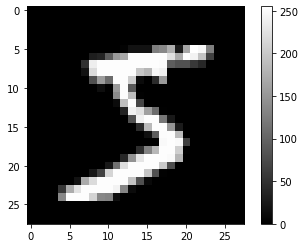

In [11]:
plt.figure()
plt.imshow(x_train[0],cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

**Test set**

In [12]:
print(x_test.shape)
print(y_test)
u, cnt = np.unique(y_test, return_counts=True)
print('unique labels:', u, 'their counts:', cnt)
print(len(y_test))

(10000, 28, 28)
[7 2 1 ... 4 5 6]
unique labels: [0 1 2 3 4 5 6 7 8 9] their counts: [ 980 1135 1032 1010  982  892  958 1028  974 1009]
10000


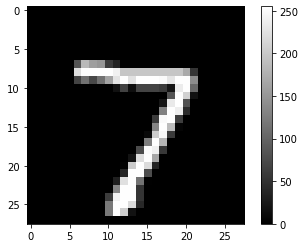

In [13]:
plt.figure()
plt.imshow(x_test[0],cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

### Normalize pixel values to be between 0 and 1

In [14]:
x_train, x_test = x_train / 255.0, x_test / 255.0

### Build a sequential model

In Keras, you assemble layers to build models. A model is (usually) a graph of layers. The most common type of model is a stack of layers: the [`tf.keras.Sequential`](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) model.

In [15]:
model1 = tf.keras.Sequential()
# Adds a flatten layer with input shape 28x28 units to the model:
model1.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
# Adds a densely-connected layer with 512 units and the _relu_ activation function to the model:
model1.add(tf.keras.layers.Dense(512, activation='relu'))
# Add a _dropout_ layer
model1.add(tf.keras.layers.Dropout(0.2))
# Add a softmax layer with 10 output units and the _softmax_ activatikon function:
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

In [16]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


or, more terse:

In [17]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


We can also plot the model as a graph:

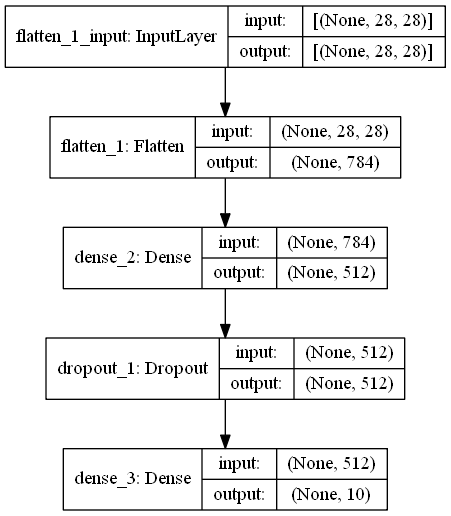

In [19]:
tf.keras.utils.plot_model(model, '/tmp/my_first_model_with_shape_info.png', show_shapes=True)

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Train and evaluate the model:

In [21]:
model.fit(x_train, y_train, epochs=5)

W0726 20:58:51.329293 19748 deprecation.py:323] From C:\Users\arvid\Anaconda3\envs\tf2-cpu\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 130us/sample - loss: 0.2198 - accuracy: 0.9341
Epoch 2/5
60000/60000 [==============================] - 8s 133us/sample - loss: 0.0980 - accuracy: 0.9701
Epoch 3/5
60000/60000 [==============================] - 7s 123us/sample - loss: 0.0687 - accuracy: 0.9787
Epoch 4/5
60000/60000 [==============================] - 7s 125us/sample - loss: 0.0520 - accuracy: 0.9830
Epoch 5/5
60000/60000 [==============================] - 8s 127us/sample - loss: 0.0449 - accuracy: 0.9855


In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 51us/sample - loss: 0.0722 - accuracy: 0.9780


In [23]:
print(test_loss.round(3))

0.072


In [24]:
print(test_acc.round(3))

0.978


The image classifier is now trained to ~97% accuracy on this dataset.

## Basic image classification using the Fashion MNIST dataset

This guide trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as we go.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

In [25]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [26]:
import matplotlib
print('tf version:', tf.__version__)
print('numpy version:', np.__version__)
print('matplotlib version:', matplotlib.__version__)

tf version: 2.0.0-beta1
numpy version: 1.16.4
matplotlib version: 3.1.1


### Import the Fashion MNIST dataset

[`Fashion-MNIST`](https://github.com/zalandoresearch/fashion-mnist) is a dataset of [Zalando](https://jobs.zalando.com/tech)'s article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a $28 \times 28$ grayscale image, associated with a label from $10$ classes (enumerated 0,1,2,...,9): 
```python
['t_shirt_top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
```
Fashion-MNIST is intended to serve as a direct **drop-in replacement** for the original MNIST dataset for benchmarking machine learning algorithms. <br> Some good reasons for this replacement are: **MNIST is too easy** (convolutional nets can achieve 99.7% on MNIST and classic machine learning algorithms can also achieve 97% easily);
**MNIST is overused** ([Ian Goodfellow](https://twitter.com/goodfellow_ian/status/852591106655043584)); **MNIST can not represent modern CV tasks** ([François Chollet](https://twitter.com/fchollet/status/852594987527045120)). <br>
Fashion-MNIST shares the same image size and structure of training and testing splits.

Here's an example how the data looks (each class takes three-rows):

![fashion-mnist](assets/fashion-mnist-sprite.png)

**Loading data with a machine learning libraries** <br>
Several machine learning libraries have included `Fashion-MNIST` as a built-in dataset with their specific APIs, e.g.

- [Kaggle](https://www.kaggle.com/zalando-research/fashionmnist)
- [Pytorch](https://pytorch.org/docs/master/torchvision/datasets.html#fashion-mnist)
- [Keras](https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles)
- [Tensorflow](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist)
- [Torch](https://github.com/mingloo/fashion-mnist)
- [JuliaML](https://github.com/JuliaML/MLDatasets.jl)


#### Video tutorial on Fashion-MNIST
*Machine Learning Meets Fashion* by Yufeng G @ Google Cloud

[![Machine Learning Meets Fashion](assets/ml_meets_fashion_video.png)](https://youtu.be/RJudqel8DVA)



In [27]:
fashion_mnist = keras.datasets.fashion_mnist

Loading the dataset returns four NumPy arrays:

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents.

In [28]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Each image is mapped to a single label. Since the _class names_ are not included with the dataset, we store them here to use later when plotting the images:

In [29]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [30]:
train_images.shape

(60000, 28, 28)

In [31]:
len(train_labels)

60000

In [32]:
test_images.shape

(10000, 28, 28)

In [33]:
len(test_labels)

10000

### Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

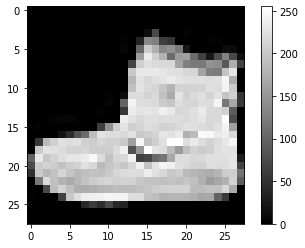

In [34]:
plt.figure()
plt.imshow(train_images[0],cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

We scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, we divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [35]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that we're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

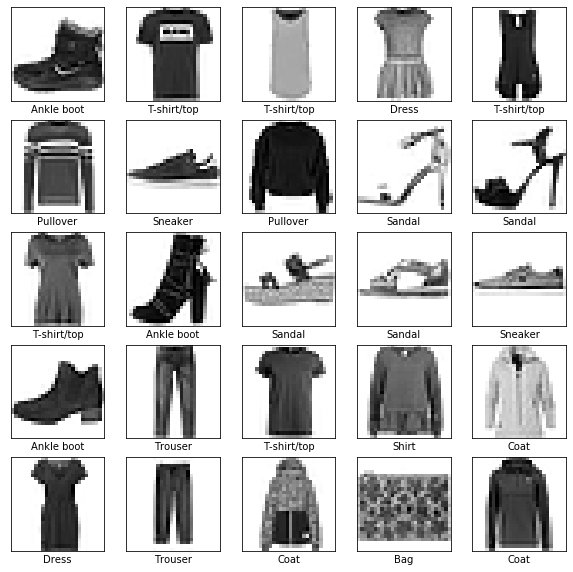

In [36]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

**Set up the layers**

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [37]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer is a 10-node *softmax* layer that returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [38]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. We ask the model to make predictions about a test set—in this example, the `test_images` array. We verify that the predictions match the labels from the `test_labels` array.

To start training,  call the `model.fit` method—so called because it "fits" the model to the training data:

In [39]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.4961 - accuracy: 0.8261
Epoch 2/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3700 - accuracy: 0.8660
Epoch 3/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3337 - accuracy: 0.8782
Epoch 4/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3111 - accuracy: 0.8848
Epoch 5/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2935 - accuracy: 0.8911
Epoch 6/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2771 - accuracy: 0.8966
Epoch 7/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2657 - accuracy: 0.9011
Epoch 8/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2549 - accuracy: 0.9055
Epoch 9/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2451 - accuracy: 0.9080
Epoch 10/10
60

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [40]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.3668 - accuracy: 0.8787

Test accuracy: 0.8787


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting is when a machine learning model performs worse on new, previously unseen inputs than on the training data.

### Make predictions

With the model trained, we can use it to make predictions about some images.

In [41]:
predictions = model.predict(test_images)

In [42]:
predictions[0]

array([1.0687451e-08, 6.1505987e-09, 3.4899841e-09, 4.5725943e-09,
       1.6058901e-10, 1.7141443e-05, 1.3223318e-08, 6.6107400e-03,
       8.4069844e-09, 9.9337208e-01], dtype=float32)

In [43]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [44]:
test_labels[0]

9

We can graph this to look at the full set of 10 class predictions.

In [45]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Let's look at the 0th image, predictions, and prediction array.

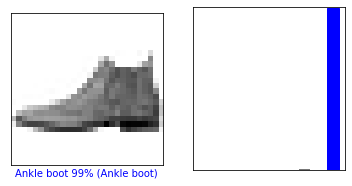

In [46]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

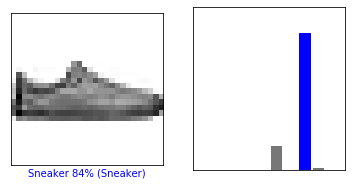

In [47]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label. Note that the model can be wrong even when very confident.

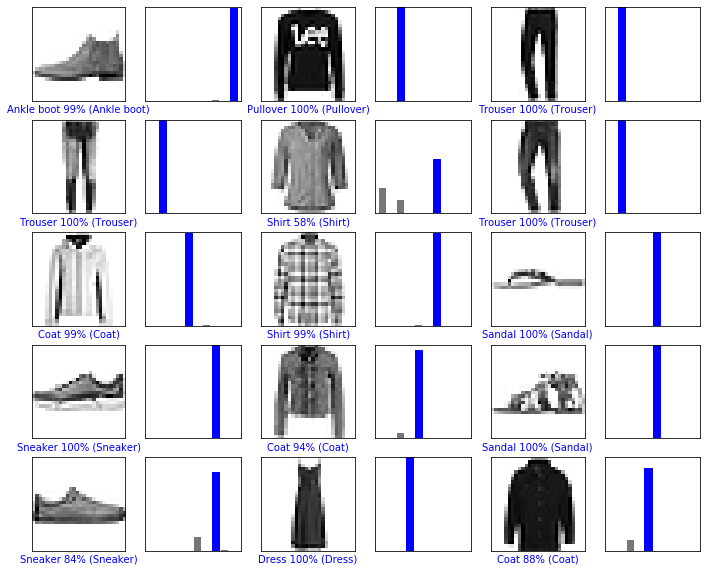

In [48]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [49]:
# Grab an image from the test dataset.
img = test_images[0]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though we're using a single image, we need to add it to a list:

In [50]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [51]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.0687451e-08 6.1506227e-09 3.4899910e-09 4.5726121e-09 1.6058932e-10
  1.7141427e-05 1.3223344e-08 6.6107400e-03 8.4070004e-09 9.9337208e-01]]


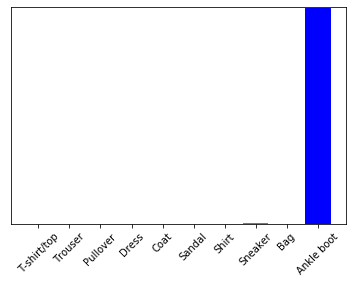

In [52]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [53]:
# And, as before, the model predicts a label of 9.
np.argmax(predictions_single[0])

9